In [4]:
import os
import numpy as np
from base import *

In [5]:
pth = r'\\10.99.134.183\kiemen-lab-data\DSAI\liver tissue data'
pthim = os.path.join(pth, '10x')
umpix = 1
pthtest = os.path.join(pth, 'testing image')
pthtestim = os.path.join(pthtest, '10x')
nm = 'DeepLabV3_plus'
resolution = '10x'

WS = [[0, 0, 0, 0, 0, 0, 2], [7, 6], 
      [1, 2, 3, 4, 5, 6, 7], 
      [4, 6, 2, 3, 5, 1, 7], []]

numclass = max(WS[2])
sxy = 1024
pthDL = os.path.join(pth, nm)
nblack = numclass + 1
nwhite = WS[1][0]
cmap = np.array([[230, 190, 100],
                  [65, 155, 210],
                  [145, 35, 35],
                  [158, 24, 118],
                  [30, 50, 50],
                  [235, 188, 215],
                  [255, 255, 255]])
classNames = ['PDAC', 'bile duct', 'vasculature', 'hepatocyte','immune','stroma','whitespace']
classCheck = []
ntrain = 15
nvalidate = np.ceil(ntrain/5)
nTA = 2

______________DeepLabV3_plus_______________
Saving model metadata and classification colormap...
Max WS[2]: 7
Classnames: ['PDAC', 'bile duct', 'vasculature', 'hepatocyte', 'immune', 'stroma', 'whitespace']
Creating Net metadata file...
TensorFlow is using the following GPU: LogicalDevice(name='/device:GPU:0', device_type='GPU')


2025-02-18 18:21:40 - INFO - 
System Resources:
2025-02-18 18:21:40 - INFO - CPU Usage: 1.7%
2025-02-18 18:21:40 - INFO - System Memory: 93.8GB / 255.3GB (36.8%)
2025-02-18 18:21:40 - INFO - Process Memory: 10973.2MB
2025-02-18 18:21:40 - INFO - 
GPU Information:
2025-02-18 18:21:40 - INFO - 
Device: GPU 0
2025-02-18 18:21:40 - INFO - Name: NVIDIA RTX 5000 Ada Generation
2025-02-18 18:21:40 - INFO - Memory: 31647.0MB / 32760.0MB
2025-02-18 18:21:40 - INFO - Utilization: 10.0%


TypeError: in user code:

    File "C:\Users\vmatosr1\PycharmProjects\CODA_python\base\train_segmentation_model_cnns.py", line 239, in load_data  *
        image = read_image(image_list)
    File "C:\Users\vmatosr1\PycharmProjects\CODA_python\base\train_segmentation_model_cnns.py", line 227, in read_image  *
        image = tf_io.read_file(image_path)

    TypeError: Input 'filename' of 'ReadFile' Op has type float32 that does not match expected type of string.


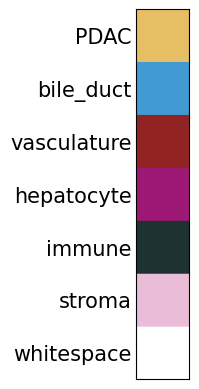

In [6]:
CNNs = ["DeepLabV3_plus"]

#Train test and classify an image for each CNN
for cnn_name in CNNs:
    print(f'______________{cnn_name}_______________')
    save_model_metadata_GUI(pthDL, pthim,pthtest, WS, nm, umpix, cmap, sxy, classNames, ntrain, nvalidate, nTA = 3,final_df = None, combined_df = None, model_type=cnn_name, batch_size=3)
    train_segmentation_model_cnns(pthDL)
    test_segmentation_model(pthDL,pthtest, pthtestim, cnn_name)
    # classify_images(pthim,pthDL, cnn_name)
    print(f'__________________________________________')